In [2]:
from imblearn.over_sampling import SMOTE
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

# 1. Load data

**1.1 Reduce memory usage by modifying datatypes**

In [3]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


**1.2 Load the csv file and reduce memory usage by 76%**

In [4]:
def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

print('-' * 80)
diamonds = import_data('diamonds.csv')
#diamonds = pd.read_csv('/kaggle/input/diamonds/diamonds.csv', header = None)

--------------------------------------------------------------------------------
Memory usage of dataframe is 4.53 MB
Memory usage after optimization is: 1.08 MB
Decreased by 76.1%


In [5]:
# Show the first instances
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.229980,Ideal,E,SI2,61.50000,55.0,326,3.949219,3.980469,2.429688
1,2,0.209961,Premium,E,SI1,59.81250,61.0,326,3.890625,3.839844,2.310547
2,3,0.229980,Good,E,VS1,56.90625,65.0,327,4.050781,4.070312,2.310547
3,4,0.290039,Premium,I,VS2,62.40625,58.0,334,4.199219,4.230469,2.630859
4,5,0.310059,Good,J,SI2,63.31250,58.0,335,4.339844,4.351562,2.750000


In [6]:
print("Data frame size:", diamonds.shape)

Data frame size: (53940, 11)


# 2. Clean data

In [7]:
# Remove first column and first row 

diamonds.drop(diamonds.columns[[0]], axis=1, inplace=True)
diamonds.drop(0, axis = 0, inplace = True)

# Column names  
diamond_names = ['Carat',
                 'Cut',
                 'Color',
                 'Clarity',
                 'Depth', 
                 'Table',
                 'Price',
                 'X',
                 'Y',
                 'Z'
]
diamonds.columns = diamond_names

# Show the first instances
diamonds.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
1,0.209961,Premium,E,SI1,59.81250,61.0,326,3.890625,3.839844,2.310547
2,0.229980,Good,E,VS1,56.90625,65.0,327,4.050781,4.070312,2.310547
3,0.290039,Premium,I,VS2,62.40625,58.0,334,4.199219,4.230469,2.630859
4,0.310059,Good,J,SI2,63.31250,58.0,335,4.339844,4.351562,2.750000
5,0.239990,Very Good,J,VVS2,62.81250,57.0,336,3.939453,3.960938,2.480469


In [8]:
diamonds.shape

(53939, 10)

In [9]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = diamonds[diamonds.duplicated()]
duplicate

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
1005,0.790039,Ideal,G,SI1,62.3125,57.0,2898,5.898438,5.851562,3.660156
1006,0.790039,Ideal,G,SI1,62.3125,57.0,2898,5.898438,5.851562,3.660156
1007,0.790039,Ideal,G,SI1,62.3125,57.0,2898,5.898438,5.851562,3.660156
1008,0.790039,Ideal,G,SI1,62.3125,57.0,2898,5.898438,5.851562,3.660156
2025,1.519531,Good,E,I1,57.3125,58.0,3105,7.531250,7.421875,4.281250
...,...,...,...,...,...,...,...,...,...,...
47969,0.520020,Ideal,D,VS2,61.8125,55.0,1919,5.191406,5.160156,3.199219
49326,0.509766,Ideal,F,VVS2,61.1875,56.0,2093,5.171875,5.191406,3.169922
49557,0.709961,Good,F,SI2,64.1250,60.0,2130,0.000000,0.000000,0.000000
50079,0.509766,Ideal,F,VVS2,61.1875,56.0,2203,5.191406,5.171875,3.169922


In [10]:
diamonds = diamonds.drop_duplicates()
diamonds.shape

(53793, 10)

In [11]:
# There are some cetegory datatypes which is important to notice
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53793 entries, 1 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Carat    53793 non-null  float16 
 1   Cut      53793 non-null  category
 2   Color    53793 non-null  category
 3   Clarity  53793 non-null  category
 4   Depth    53793 non-null  float16 
 5   Table    53793 non-null  float16 
 6   Price    53793 non-null  int16   
 7   X        53793 non-null  float16 
 8   Y        53793 non-null  float16 
 9   Z        53793 non-null  float16 
dtypes: category(3), float16(6), int16(1)
memory usage: 1.3 MB


In [12]:
# Transpose index and columns + round the values to 3 decimals 
#  by default, the method only shows statistics for the numeric variables.
diamonds.describe().T.round(3)


,count,mean,std,min,25%,50%,75%,max
Carat,53793.0,0.798,0.473,0.2,0.400,0.700,1.040,5.012
Depth,53793.0,inf,1.430,43.0,61.000,61.812,62.500,79.000
Table,53793.0,inf,2.234,43.0,56.000,57.000,59.000,95.000
Price,53793.0,3933.132,3988.121,326.0,951.000,2401.000,5327.000,18823.000
X,53793.0,inf,1.121,0.0,4.711,5.699,6.539,10.742
Y,53793.0,inf,1.142,0.0,4.719,5.711,6.539,58.906
Z,53793.0,inf,0.705,0.0,2.910,3.529,4.031,31.797


In [13]:
# Just to ceck for any structural error. Testing that the row with max value for 'Carat' actucally make sense 
diamonds.loc[diamonds['Carat']== 5.01]

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
27415,5.011719,Fair,J,I1,65.5,59.0,18018,10.742188,10.539062,6.980469


**2.1 ) X, Y, and Z have 0 as min value. Finding all rows with 0 values for X, Y and Z**

In [14]:
# Count number of zeros in all columns of Dataframe
for column_name in diamonds.columns:
    column = diamonds[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Carat  is :  0
Count of zeros in column  Cut  is :  0
Count of zeros in column  Color  is :  0
Count of zeros in column  Clarity  is :  0
Count of zeros in column  Depth  is :  0
Count of zeros in column  Table  is :  0
Count of zeros in column  Price  is :  0
Count of zeros in column  X  is :  7
Count of zeros in column  Y  is :  6
Count of zeros in column  Z  is :  19


In [15]:
diamonds.loc[(diamonds['X']==0) | (diamonds['Y']==0) | (diamonds['Z']==0)]


,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
2207,1.000000,Premium,G,SI2,59.09375,59.0,3142,6.550781,6.480469,0.0
2314,1.009766,Premium,H,I1,58.09375,59.0,3167,6.660156,6.601562,0.0
4791,1.099609,Premium,G,SI2,63.00000,59.0,3696,6.500000,6.468750,0.0
5471,1.009766,Premium,F,SI2,59.18750,58.0,3837,6.500000,6.468750,0.0
10167,1.500000,Good,G,I1,64.00000,61.0,4731,7.148438,7.039062,0.0
11182,1.070312,Ideal,F,SI2,61.59375,56.0,4954,0.000000,6.621094,0.0
11963,1.000000,Very Good,H,VS2,63.31250,53.0,5139,0.000000,0.000000,0.0
13601,1.150391,Ideal,G,VS2,59.18750,56.0,5564,6.878906,6.828125,0.0
15951,1.139648,Fair,G,VS1,57.50000,67.0,6381,0.000000,0.000000,0.0
24394,2.179688,Premium,H,SI2,59.40625,61.0,12631,8.492188,8.453125,0.0


In [16]:
# make a new df without any 0 values for X,Y and Z without these few rows.  
diamonds = diamonds[(diamonds[['X','Y','Z']] != 0).all(axis=1)]

In [17]:
# Checking other columns that have numerical values ,just to be sure.
diamonds.loc[(diamonds['Depth']==0) | (diamonds['Table']==0)]

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z


**2.2) Finding Null values**

In [18]:
# checking for missing values
diamonds.isnull().sum()

Carat      0
Cut        0
Color      0
Clarity    0
Depth      0
Table      0
Price      0
X          0
Y          0
Z          0
dtype: int64

In [19]:
# Transpose index and columns + round the values to 3 decimals 
#  by default, the method only shows statistics for the numeric variables.
diamonds.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Carat,53774.0,0.798,0.473,0.20,0.400,0.700,1.040,5.012
Depth,53774.0,inf,1.430,43.00,61.000,61.812,62.500,79.000
Table,53774.0,inf,2.234,43.00,56.000,57.000,59.000,95.000
Price,53774.0,3931.287,3985.925,326.00,951.000,2401.000,5324.000,18823.000
X,53774.0,inf,1.119,3.73,4.711,5.699,6.539,10.742
Y,53774.0,inf,1.140,3.68,4.719,5.711,6.539,58.906
Z,53774.0,inf,0.702,1.07,2.910,3.529,4.031,31.797


In [20]:
# The memory usage after cleaning the data is 1.3 MB sompared to 4.5 MB before reducing memory usage
end_mem = diamonds.memory_usage().sum() / 1024**2
end_mem

1.2829608917236328

In [21]:
# Show the distribution of categories by counting the different 
# values and dividing by the number of rows
diamonds['Clarity'].value_counts()/len(diamonds)

SI1     0.242310
VS2     0.227340
SI2     0.169989
VS1     0.151653
VVS2    0.094023
VVS1    0.067802
IF      0.033176
I1      0.013706
Name: Clarity, dtype: float64

# 3.Exploratory Data Analysis

We want to focus on relation between price and cut. The goal is to explore data for having best classification result classifying Cut.

<AxesSubplot:xlabel='Price', ylabel='Density'>

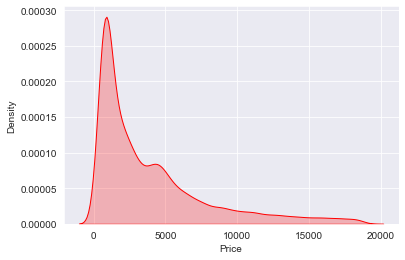

In [22]:
sns.kdeplot(diamonds['Price'], shade=True , color='r')

C:\Users\Isak\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


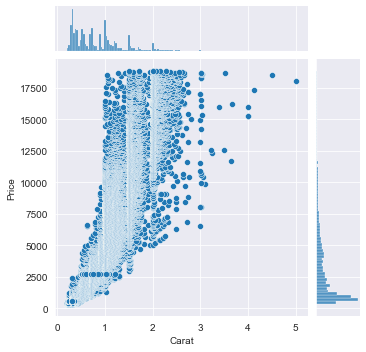

In [23]:
sns.jointplot(x='Carat' , y='Price' , data=diamonds , size=5)

# Clarity and Color

I was interessted in finding out releation beetween Color and Clarity.Diamond Clarity refers to the absence of the Inclusions and Blemishes.
In order from Best to Worst, FL = flawless, I3= level 3 inclusions. 
FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3 

In [24]:
# Cross tabulation between Clarity and Color is not easy to read
CrosstabResult=pd.crosstab(index=diamonds['Clarity'],columns=diamonds['Color'])
print(CrosstabResult)

Color       D     E     F     G     H     I    J
Clarity                                         
I1         42   101   143   148   161    92   50
IF         73   158   383   678   298   143   51
SI1      2074  2423  2127  1969  2267  1420  750
SI2      1367  1703  1598  1540  1550   904  479
VS1       705  1281  1362  2141  1166   961  539
VS2      1691  2464  2198  2340  1637  1166  729
VVS1      249   656   734   995   583   355   74
VVS2      553   989   972  1443   604   365  130


<AxesSubplot:xlabel='Clarity'>

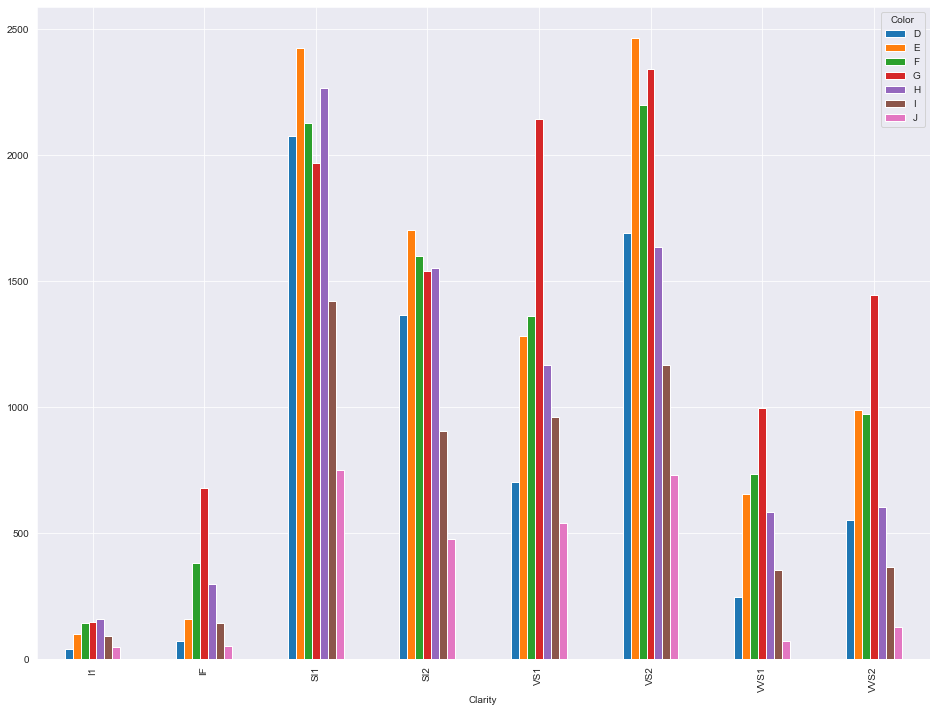

In [25]:
# Grouped bar chart between GENDER and APPROVE_LOAN
%matplotlib inline 
# only needed for jupyter notebook
CrosstabResult.plot.bar(figsize=(16, 12))

<AxesSubplot:xlabel='Clarity', ylabel='Count'>

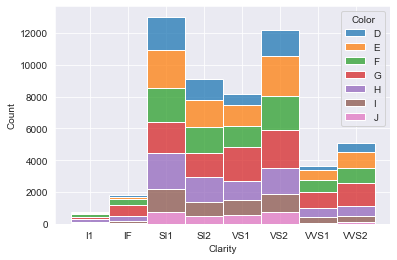

In [26]:
# we try using a stacked histogram , maybe it is easier to read the relation 
sns.histplot(data=diamonds, binwidth=0.5, x="Clarity", hue="Color", stat="count", multiple="stack")

# Feature exploration 

**We take a look at relationship between target feature(price) and other features using heatmap. 
But the categorical values are not in the plot. We fix this by encoding**

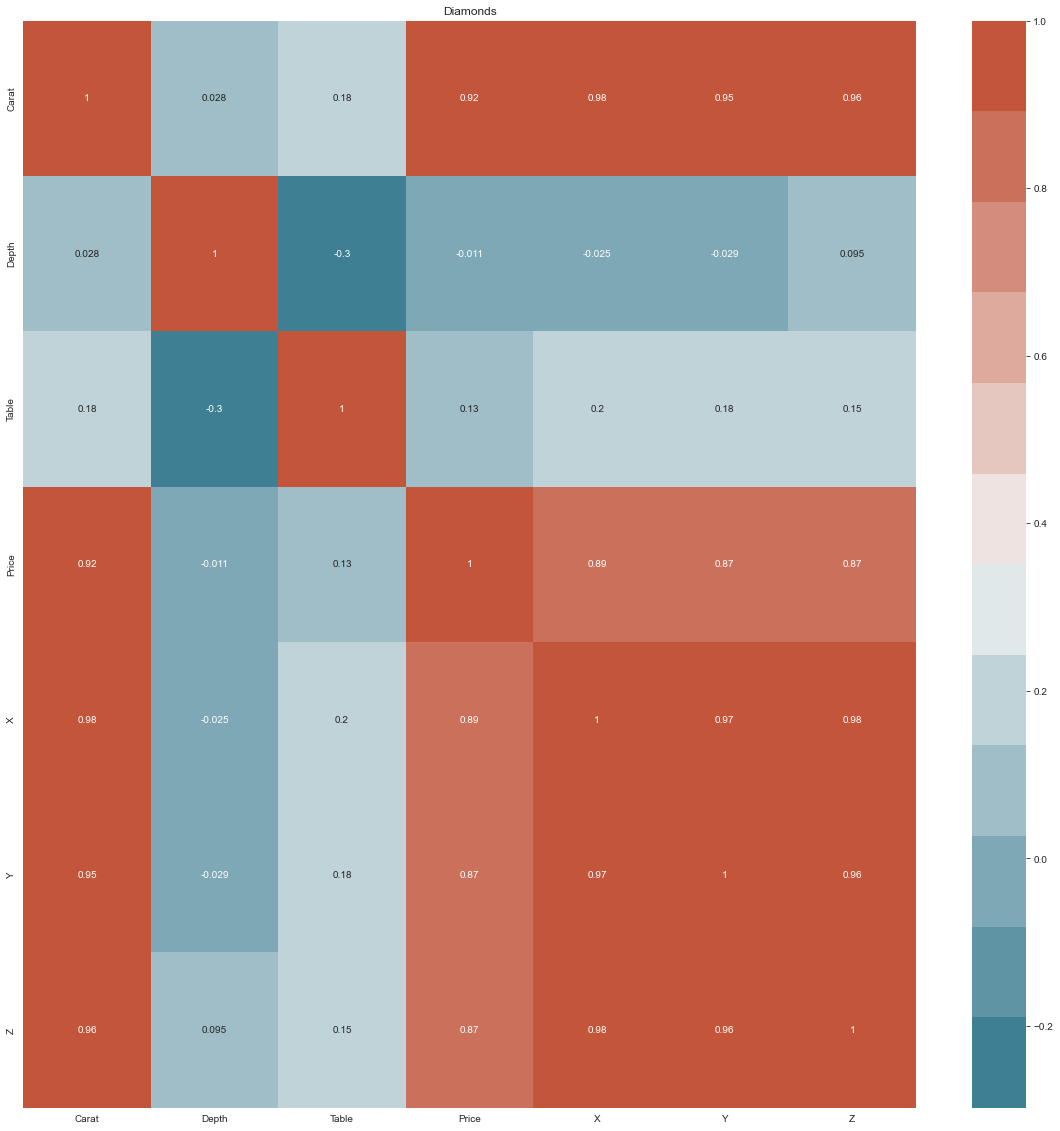

In [27]:
plt.figure(figsize=(20, 20))
df_corr = diamonds.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)
plt.title("Diamonds")
plt.show()

In [28]:
# encoding categoricla values for a better Heat map visualtion , late on we use one-hot encoding for training algorithms
from sklearn.preprocessing import LabelEncoder

label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()


diamonds['Cut'] = label_cut.fit_transform(diamonds['Cut'])
diamonds['Color'] = label_color.fit_transform(diamonds['Color'])
diamonds['Clarity'] = label_clarity.fit_transform(diamonds['Clarity'])

diamonds.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
1,0.209961,3,1,2,59.81250,61.0,326,3.890625,3.839844,2.310547
2,0.229980,1,1,4,56.90625,65.0,327,4.050781,4.070312,2.310547
3,0.290039,3,5,5,62.40625,58.0,334,4.199219,4.230469,2.630859
4,0.310059,1,6,3,63.31250,58.0,335,4.339844,4.351562,2.750000
5,0.239990,4,6,7,62.81250,57.0,336,3.939453,3.960938,2.480469


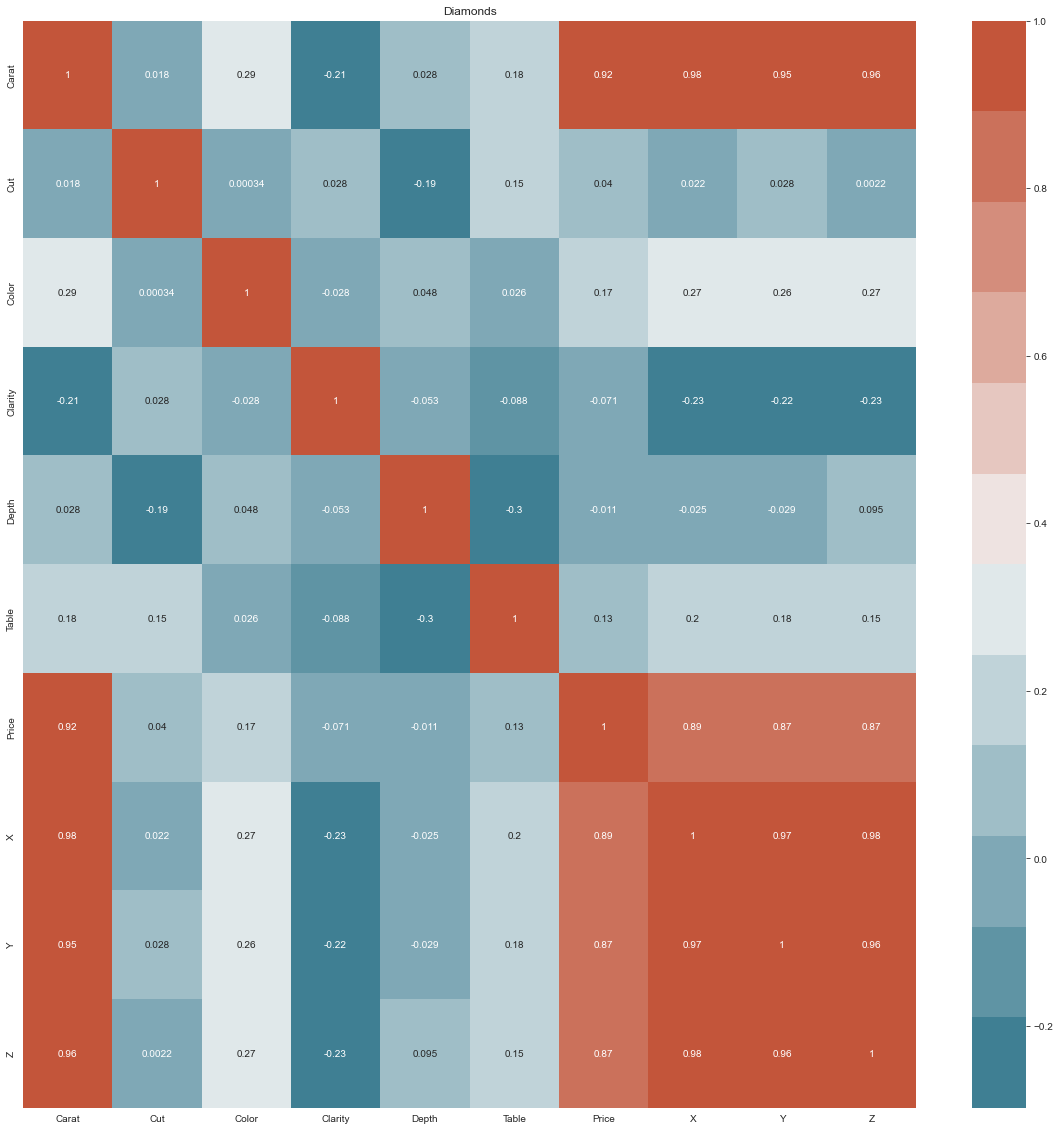

In [29]:
# New heatmap with all features. 
plt.figure(figsize=(20, 20))
df_corr = diamonds.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)
plt.title("Diamonds")
plt.show()

# Create volume feature and drop X,Y,Z

In [30]:
diamonds['volume'] = diamonds['X']*diamonds['Y']*diamonds['Z']
diamonds.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z,volume
1,0.209961,3,1,2,59.81250,61.0,326,3.890625,3.839844,2.310547,34.50000
2,0.229980,1,1,4,56.90625,65.0,327,4.050781,4.070312,2.310547,38.09375
3,0.290039,3,5,5,62.40625,58.0,334,4.199219,4.230469,2.630859,46.75000
4,0.310059,1,6,3,63.31250,58.0,335,4.339844,4.351562,2.750000,51.93750
5,0.239990,4,6,7,62.81250,57.0,336,3.939453,3.960938,2.480469,38.68750


(0.0, 40000.0)

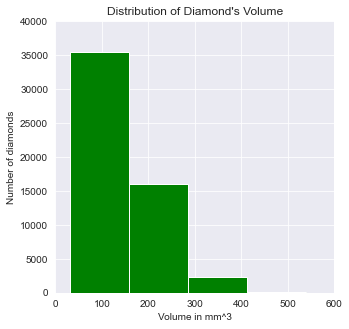

In [31]:

plt.figure(figsize=(5,5))
plt.hist( x=diamonds['volume'] , bins=30 ,color='g')
plt.xlabel('Volume in mm^3')
plt.ylabel('Number of diamonds')
plt.title('Distribution of Diamond\'s Volume')
plt.xlim(0,600)
plt.ylim(0,40000)

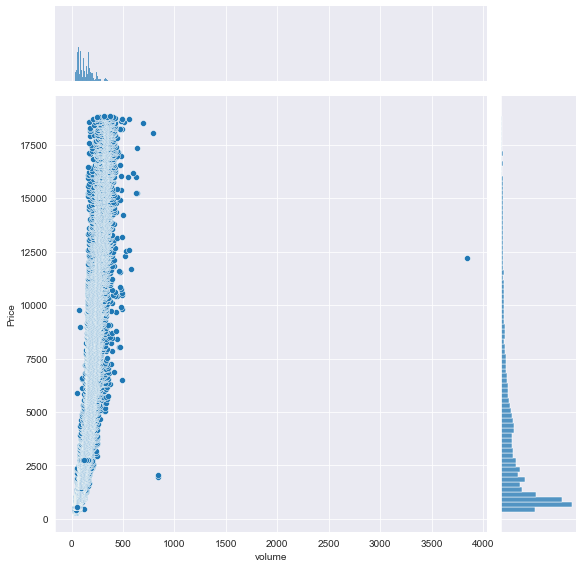

In [32]:
sns.jointplot(x='volume', y='Price' , data=diamonds, height=8)


In [33]:
# do not need x,y and z anymore when we can represent all three using volume
diamonds.drop(['X','Y','Z'], axis=1, inplace= True)
diamonds.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price,volume
1,0.209961,3,1,2,59.81250,61.0,326,34.50000
2,0.229980,1,1,4,56.90625,65.0,327,38.09375
3,0.290039,3,5,5,62.40625,58.0,334,46.75000
4,0.310059,1,6,3,63.31250,58.0,335,51.93750
5,0.239990,4,6,7,62.81250,57.0,336,38.68750


# look at distribution of each feature with focus on categorical features

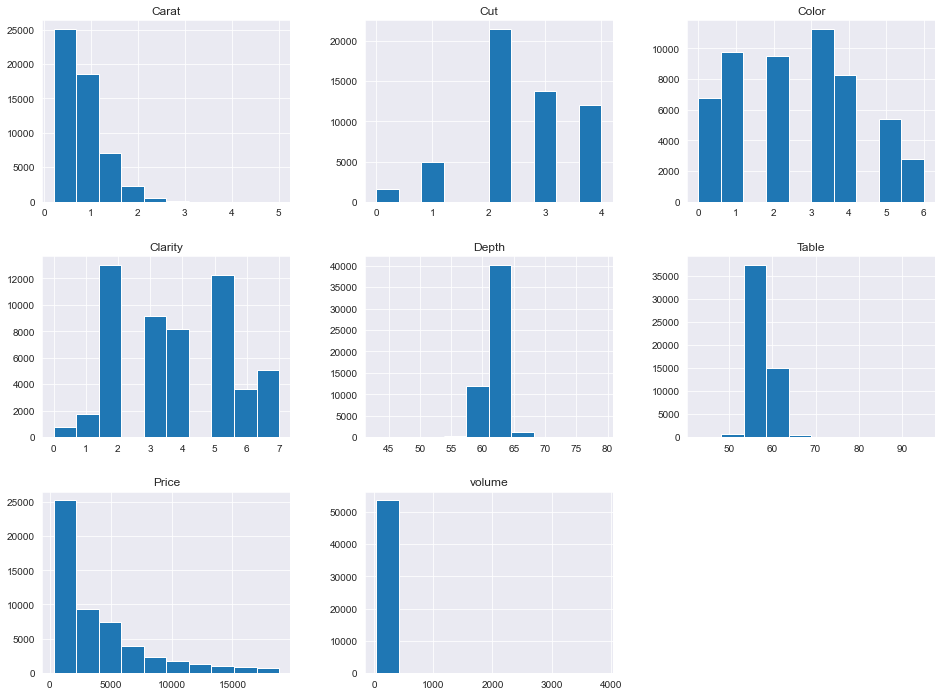

In [34]:
# showing the distribution of diamonds for each feature before encoding the categorical values
diamonds.hist(figsize=(16, 12));

In [35]:
# Show the distribution of feature categories/types , we can see type 0 is less than 2%. could use thresholding method 
diamonds['Clarity'].value_counts()/len(diamonds)

2    0.242310
5    0.227340
3    0.169989
4    0.151653
7    0.094023
6    0.067802
1    0.033176
0    0.013706
Name: Clarity, dtype: float64

In [36]:
# 0 here represents clarity = I1
diamonds.value_counts('Clarity')

Clarity
2    13030
5    12225
3     9141
4     8155
7     5056
6     3646
1     1784
0      737
dtype: int64

C:\Users\Isak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Clarity', ylabel='count'>

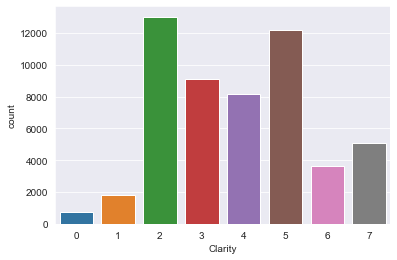

In [37]:
sns.countplot(diamonds['Clarity'])

C:\Users\Isak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Color', ylabel='count'>

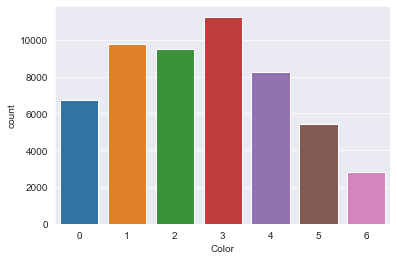

In [38]:
# color looks good
sns.countplot(diamonds['Color'])

C:\Users\Isak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cut', ylabel='count'>

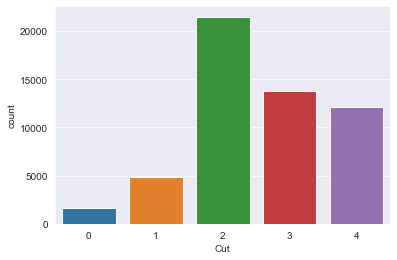

In [39]:
# The plot shows impbalanced data for Cut column, Fair cut to Ideal cut ratio is 13.5. (0.399524 % and 0.029698). we will use
sns.countplot(diamonds['Cut'])

In [40]:
diamonds.value_counts('Cut')

Cut
2    21484
3    13737
4    12068
1     4888
0     1597
dtype: int64

# Handling imbalanced feature

Class=3, n=13737 (25.546%)
Class=1, n=4888 (9.090%)
Class=4, n=12068 (22.442%)
Class=0, n=1597 (2.970%)
Class=2, n=21484 (39.952%)


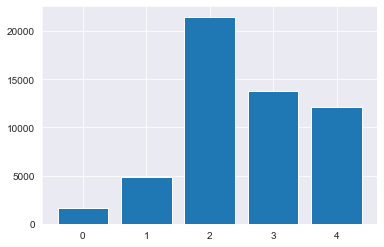

In [41]:
# we can sompare the distribution now to the result of next code block
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

data = diamonds.values
# split into input and output elements
X, y = data[:, :1], data[:, 1]

# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=3, n=21484 (20.000%)
Class=1, n=21484 (20.000%)
Class=4, n=21484 (20.000%)
Class=0, n=21484 (20.000%)
Class=2, n=21484 (20.000%)


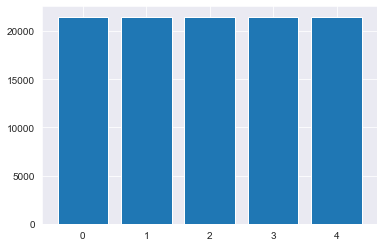

In [42]:
from imblearn.over_sampling import SMOTE

data = diamonds.values
# split into input and output elements
X, y = data[:, :1], data[:, 1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

# Encoding categorical value

In [43]:
# using one-hot encoder is better than labelEncoder , now that data is cleaned and balanced we can do the encoding
clarity = pd.get_dummies(diamonds['Clarity'])
color = pd.get_dummies(diamonds['Color'])
#cut =  pd.get_dummies(diamonds['Cut'])

clarity

,0,1,2,3,4,5,6,7
1,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
53935,0,0,1,0,0,0,0,0
53936,0,0,1,0,0,0,0,0
53937,0,0,1,0,0,0,0,0
53938,0,0,0,1,0,0,0,0


In [44]:
diamonds = pd.concat([diamonds , clarity , color] , axis = 1)

In [45]:
# drop the converted categorical columns 
diamonds.drop(['Color' , 'Clarity'] , axis = 1 , inplace=True)

# Splitting dataset 


In [46]:
from sklearn.model_selection import train_test_split

# Split into training and test data (75/25)
train_X, test_X, train_y, test_y = train_test_split(diamonds.drop('Cut', axis=1), diamonds['Cut'])

# Scaling the features

In [47]:
# Applying Feature Scaling ( MinMaxScaler ) as the last step in a long prosess. 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_X = scaler.fit_transform(train_X)
# test_X = scaler.transform(test_X)

C:\Users\Isak\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Isak\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Train and test a simple decision tree on the data for benchmark purposes
tree_scores = cross_val_score(DecisionTreeClassifier(), train_X, train_y)

# We are using cross-validation, so the overfitted results are "hidden", we only
# get an estimate for the performance based on the hold-out sets.
(tree_scores.mean(), tree_scores.std())

(0.6487478303992066, 0.0049834511854787164)

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Train and test random forest classifier with default parameters
rf_scores = cross_val_score(RandomForestClassifier(), train_X, train_y)
(rf_scores.mean(), rf_scores.std())

(0.7162162162162161, 0.006180483549371761)

In [50]:
from sklearn.ensemble import AdaBoostClassifier

# Train and test an AdaBoost classifier with default parameters
ada_scores = cross_val_score(AdaBoostClassifier(), train_X, train_y)

(ada_scores.mean(), ada_scores.std())

(0.6816265807091495, 0.007247312381858203)

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

# Train and test an GradientBoosting classifier with default parameters
grad_scores = cross_val_score(GradientBoostingClassifier(), train_X, train_y)

(grad_scores.mean(), grad_scores.std())

(0.7412844036697248, 0.0037080580102018847)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Test a range of different values for n_estimators for a RandomForestClassifier
rf_params = {'n_estimators':list(range(10,201,10))}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params)
rf_grid.fit(train_X, train_y)

rf_results = pd.DataFrame(rf_grid.cv_results_)

In [ ]:
# Test a range of different values for n_estimators for a GradientBoosting classifier
grad_params = {'n_estimators':list(range(10,201,10))}
grad_grid = GridSearchCV(GradientBoostingClassifier(), rf_params)
grad_grid.fit(train_X, train_y)

grad_results = pd.DataFrame(grad_grid.cv_results_)

In [ ]:
import matplotlib.pyplot as plt

# Plot the results for both random forest and gradient boosting in a single figure
plt.plot(rf_results['param_n_estimators'], rf_results['mean_test_score'], label='RandomForest')
plt.plot(grad_results['param_n_estimators'], grad_results['mean_test_score'], label='GradientBoosting')
plt.legend()
plt.show()

In [ ]:
# Train the final RF model using best parameter
rf_model = RandomForestClassifier(n_estimators=rf_grid.best_params_['n_estimators'])
rf_model.fit(train_X, train_y)

In [ ]:
# Train the final GD model using best parameter
grad_model = GradientBoostingClassifier(n_estimators=grad_grid.best_params_['n_estimators'])
grad_model.fit(train_X, train_y)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

fig,ax = plt.subplots(1,2,figsize=(10,5))
ConfusionMatrixDisplay.from_estimator(rf_model, test_X, test_y, ax=ax[0])
ConfusionMatrixDisplay.from_estimator(grad_model, test_X, test_y, ax=ax[1])